# HD molecule in 1D

This notebook demonstrates basic use of the split-step Fourier routines on a 3D example, that of a 1D HD molecule without the Born--Oppenheimer approximation. An external laser field perturbs the system. The nuclear potential is a gaussian well or a smoothed Coulomb potential.

The HD molecule is a 4 particle problem: one H nucleus, one D nucleus, and 2 electrons.

In [1]:
import numpy as np
from fft_tdse import *
from psiviz import *
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import h5py
%matplotlib inline

## Set up molecule and grid

In [15]:
q = [1.0, 1.0, -1.0, -1.0] # charges of particles
m = [200, 100, 1, 1]  #masses of particles
mu = [m[0]*m[1]/(m[0]+m[1]), m[0]*m[2]/(m[0]+m[2]), m[0]*m[3]/(m[0]+m[3])] # reduced masses

# model Coulomb potential
Ufun = lambda x: np.exp(-0.1*x**2)
# manybody potentials
Vfun = lambda xx: q[0]*q[1]*Ufun(xx[0]) + q[0]*q[2]*Ufun(xx[1]) + q[0]*q[3]*Ufun(xx[2]) + q[1]*q[2]*Ufun(xx[0]-xx[1]) + q[1]*q[3]*Ufun(xx[0]-xx[2]) + q[2]*q[3]*Ufun(xx[1]-xx[2])
Tfun = lambda kk: (1.0/m[0]) * (kk[0]*kk[1] + kk[0]*kk[2] + kk[1]*kk[2]) + (0.5/mu[0])*kk[0]**2 + (0.5/mu[1])*kk[1]**2 + (0.5/mu[2])*kk[2]**2
Dfun = lambda xx: q[1]*xx[0] + q[2]*xx[1] * q[3]*xx[2]

# Set up grid
L = 100
ng = 128
grid = FourierGrid([-L,-L,-L], [L,L,L], [ng, ng, ng])
t_final = 100


## Set up electric field

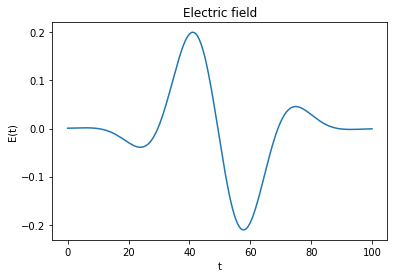

In [16]:
# Set up laser field
E0, tau, om, T = 0.25, 20.5, 1.0/(2*np.pi), 50

Efun = lambda t: E0*np.exp(-(t-T)**2/tau**2) * np.cos(om*t)

plt.figure()
t = np.linspace(0,t_final,200)
plt.plot(t,Efun(t))
plt.title('Electric field')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.show()


## Compute ground state wavefunction

Iteration 0, delta = 0.33909570621136936, resid = 0.15700327902602865, E = -1.557202932476251
Iteration 1, delta = 0.1438662305021051, resid = 0.05984947344863455, E = -1.5872280600185986
Iteration 2, delta = 0.07395722965674904, resid = 0.030128687909673334, E = -1.593456176505974
Iteration 3, delta = 0.057161597546821166, resid = 0.023101939459164292, E = -1.5963439761758331
Iteration 4, delta = 0.05556543317601168, resid = 0.022316874918214095, E = -1.5988328276833095
Iteration 5, delta = 0.05702632115836662, resid = 0.022758646272718563, E = -1.6013966493855283
Iteration 6, delta = 0.058975137674887254, resid = 0.023377788684380365, E = -1.6041164550877296
Iteration 7, delta = 0.060861297911920645, resid = 0.023951934800693842, E = -1.6069973421172055
Iteration 8, delta = 0.06248484972696704, resid = 0.02440359554161131, E = -1.6100198531192425
Iteration 9, delta = 0.06371182828046822, resid = 0.024684583652575198, E = -1.6131488677597614
Iteration 10, delta = 0.06443516922658665, 

Iteration 84, delta = 0.0004960033385382914, resid = 0.0001737236638199124, E = -1.649753067576223
Iteration 85, delta = 0.0004640585895485115, resid = 0.00016253503816448535, E = -1.6497532236198094
Iteration 86, delta = 0.00043417431724253986, resid = 0.0001520681064442995, E = -1.6497533602122918
Iteration 87, delta = 0.00040621715545759407, resid = 0.00014227615395508337, E = -1.6497534797798787
Iteration 88, delta = 0.000380062439218453, resid = 0.00013311551423199838, E = -1.6497535844458298
Iteration 89, delta = 0.0003555936268267401, resid = 0.00012454536651371572, E = -1.6497536760683351
Iteration 90, delta = 0.00033270176183243234, resid = 0.00011652754719867273, E = -1.6497537562736688
Iteration 91, delta = 0.00031128497192518123, resid = 0.00010902637425007304, E = -1.6497538264851803
Iteration 92, delta = 0.00029124800201984477, resid = 0.00010200848359420535, E = -1.6497538879486309
Iteration 93, delta = 0.0002725017790513814, resid = 9.544267663462566e-05, E = -1.6497539

Iteration 165, delta = 2.2698923919090583e-06, resid = 7.950200651215608e-07, E = -1.6497543198890376
Iteration 166, delta = 2.1238671237980384e-06, resid = 7.438753578117755e-07, E = -1.6497543198923057
Iteration 167, delta = 1.987235913161714e-06, resid = 6.960208568938462e-07, E = -1.6497543198951687
Iteration 168, delta = 1.859394333001014e-06, resid = 6.512449081851067e-07, E = -1.6497543198976727
Iteration 169, delta = 1.7397769942772786e-06, resid = 6.093494482870841e-07, E = -1.649754319899867
Iteration 170, delta = 1.627854791929609e-06, resid = 5.701492093761594e-07, E = -1.649754319901788
Iteration 171, delta = 1.523132728565972e-06, resid = 5.334707254884194e-07, E = -1.6497543199034646
Iteration 172, delta = 1.4251475358654691e-06, resid = 4.991518718577709e-07, E = -1.649754319904939
Iteration 173, delta = 1.3334659043984987e-06, resid = 4.6704077742579467e-07, E = -1.6497543199062272
Iteration 174, delta = 1.247682242046323e-06, resid = 4.3699538813776393e-07, E = -1.649

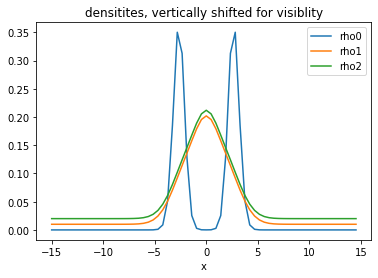

In [18]:


def compute_ground_state(L2,ng2,Tfun,Vfun):
    """ Compute ground state wavefunction on a suitable grid, 
    and then extrapolate to the computationa grid. """
    
    grid2 = FourierGrid([-L2,-L2,-L2],[L2,L2,L2],[ng2,ng2,ng2])
    xx = grid2.xx
    
    ham = FourierHamiltonian(grid2, Tfun = Tfun, Vfun = Vfun)
        
    gs = GroundStateComputer(ham)
    gs.setInitialGuess(np.exp(-(xx[0]**2 + xx[1]**2 + xx[2]**2)/2))
    
    E = gs.invit(sigma = np.min(ham.V), tol=1e-7)

    plt.figure()
    plt.plot(grid2.x[0],gs.wf.density(0))
    plt.plot(grid2.x[1],gs.wf.density(1)+.01)
    plt.plot(grid2.x[2],gs.wf.density(2)+.02)
    plt.legend(['rho0', 'rho1', 'rho2'])
    plt.xlabel('x')
    plt.title('densitites, vertically shifted for visiblity')
    plt.show()
    
    
    return gs.wf

# Compute ground state on a smaller grid, then extrapolate.
psi0 = compute_ground_state(15,64,Tfun,Vfun)

## Set up initial condition and propagator

In [19]:
def visualize(wf,heading):
    """ Visualize the wavefunction. """

    plt.figure()
    plt.plot(grid.x[0],wf.density(0))
    plt.plot(grid.x[1],wf.density(1)+.005)
    #plt.plot(grid.x[2],wf.density(2)+.02)
    plt.ylim([0,0.3])
    plt.legend(['rho0', 'rho1', 'rho2'])
    plt.xlabel('x')
    plt.title(heading)
    plt.show()
    

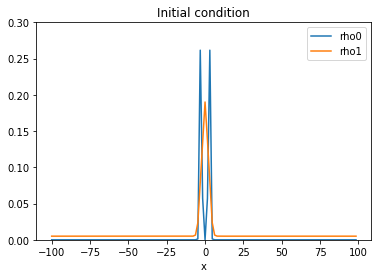

In [20]:
# Set up initial condition.

# Create a wavefunction object
wf = FourierWavefunction(grid)
wf.setPsi(psi0.interpolate(grid).psi,normalize=True)
visualize(wf,'Initial condition')

# Set up Hamiltonian
ham = FourierHamiltonian(grid, Tfun=Tfun, Vfun = Vfun, Dfun = Dfun, Efun=Efun)

# Create a Strang splitting propagator
dt = 0.01 
prop = Propagator(ham, dt)

# Main simulation loop -- with data saving

This is the main simulation loop. A HDF5 file is created, where all relevant simulation
data is stored, including the grid and the laser parameters.  For every time step, densities and currents
are calculated and saved. At every other time step, the complete wavefunction is also saved.

For a large 3D calculation, quite a lot of data will be generated!


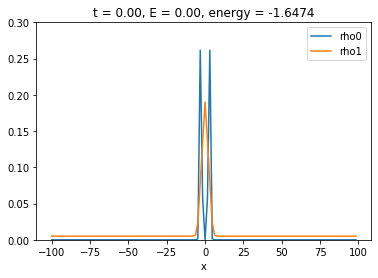

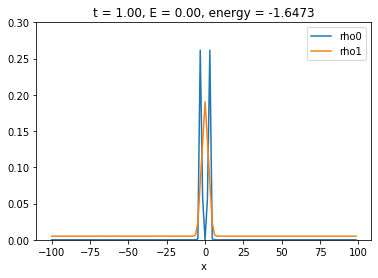

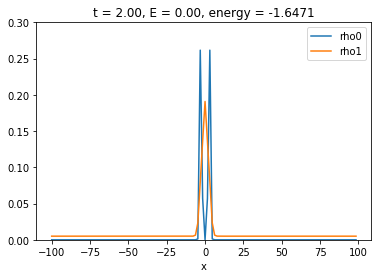

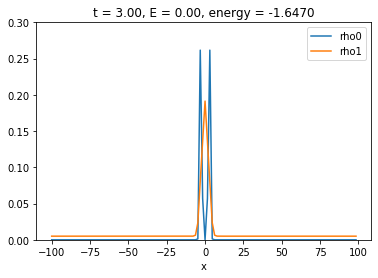

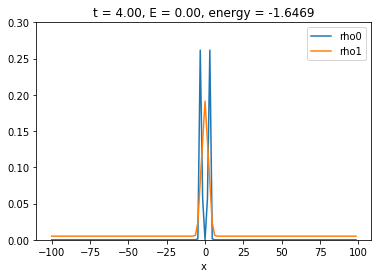

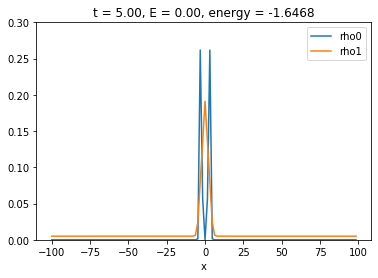

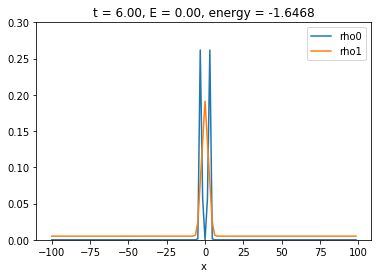

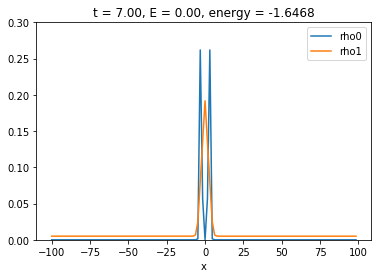

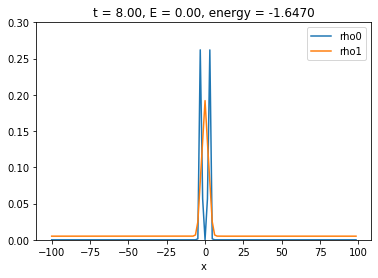

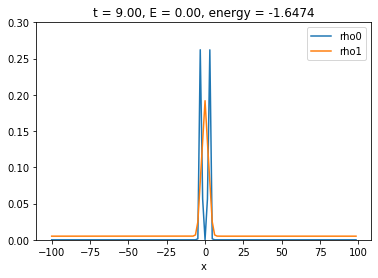

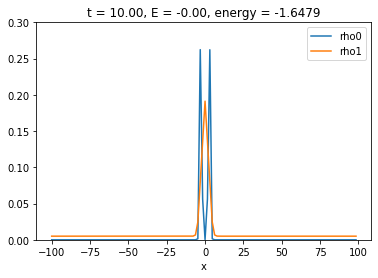

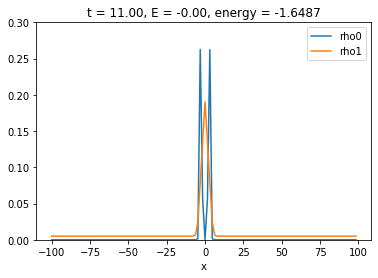

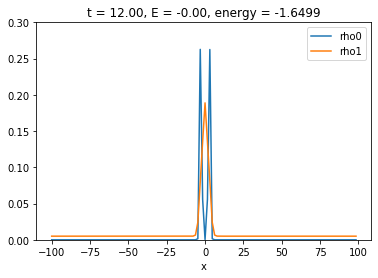

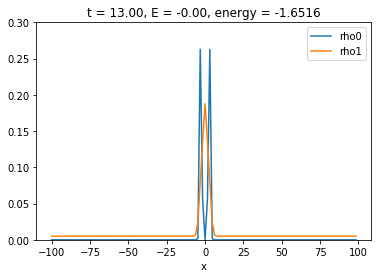

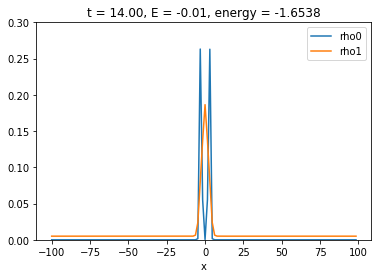

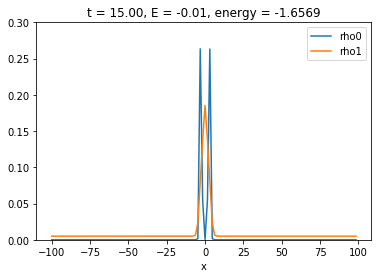

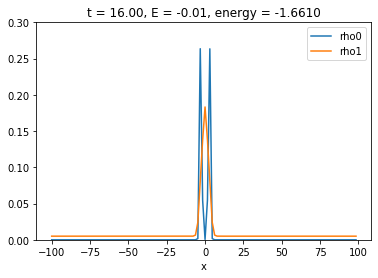

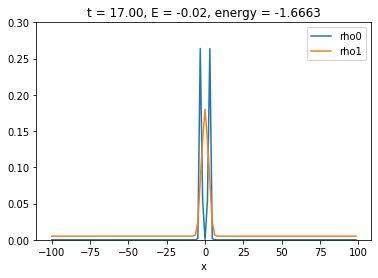

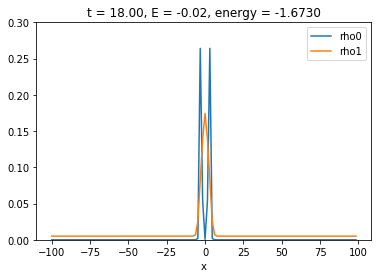

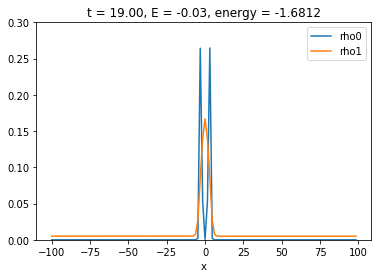

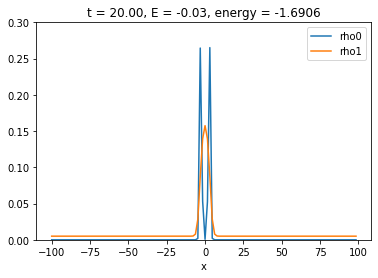

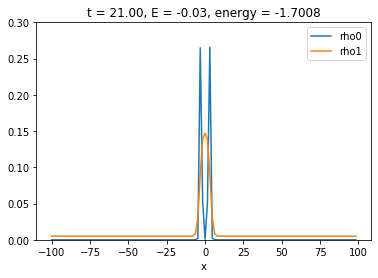

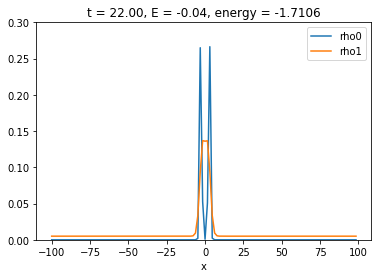

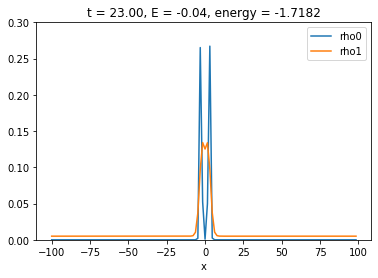

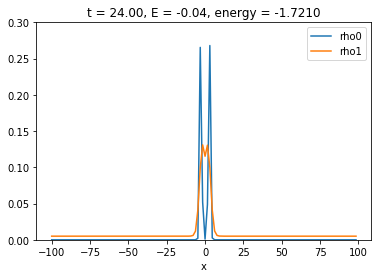

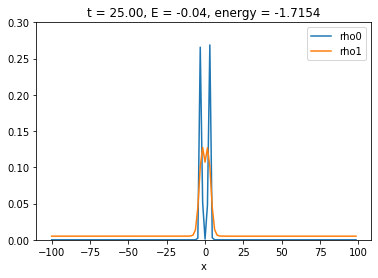

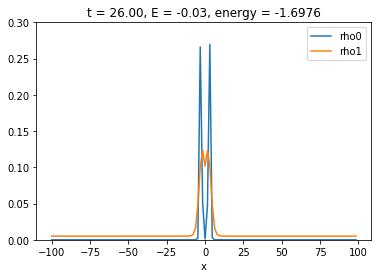

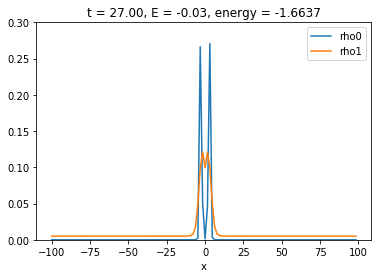

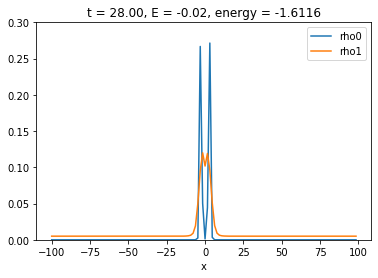

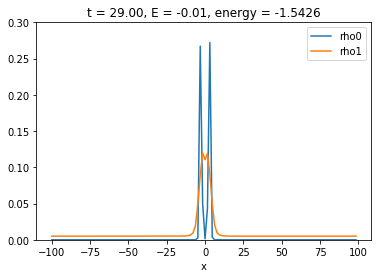

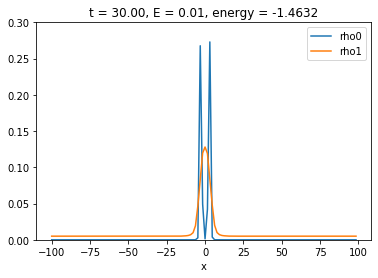

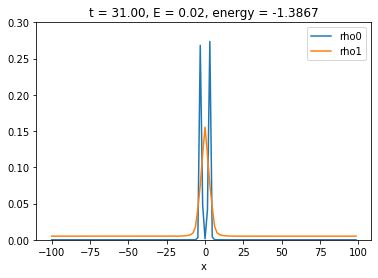

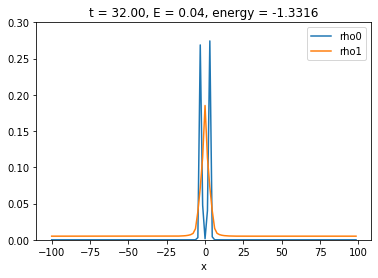

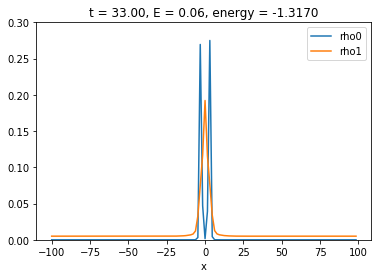

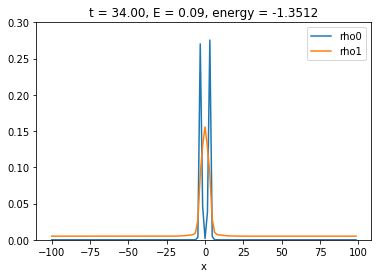

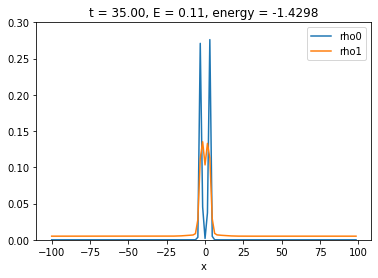

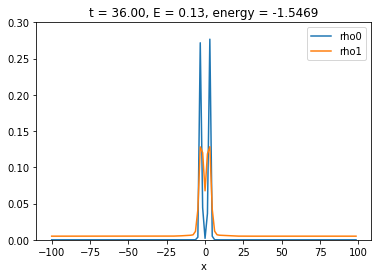

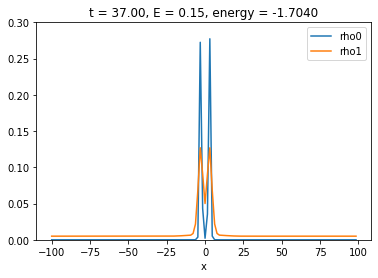

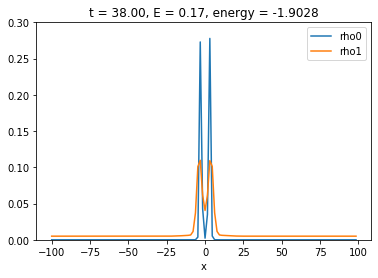

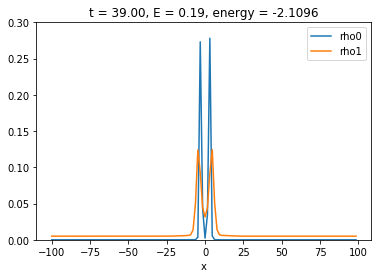

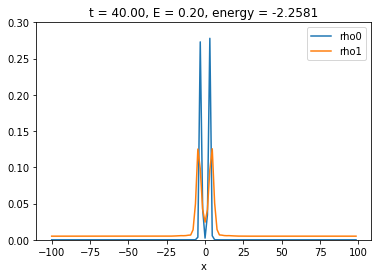

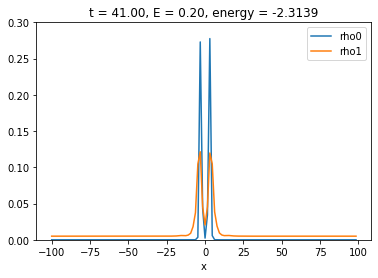

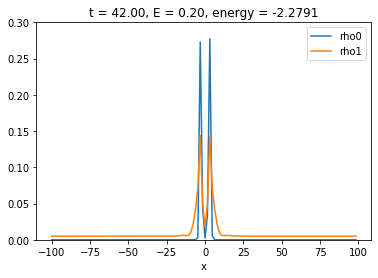

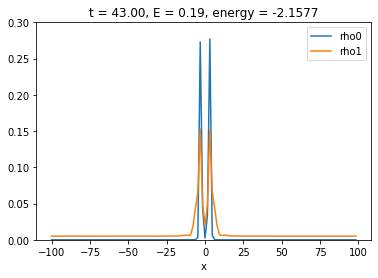

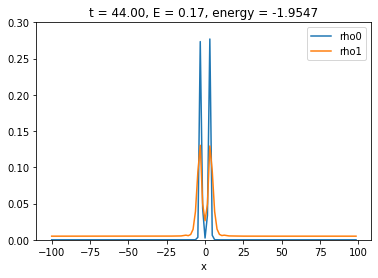

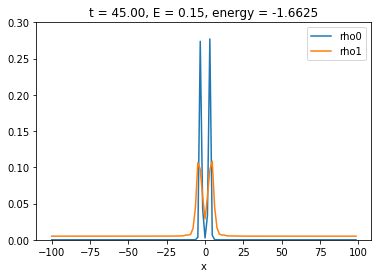

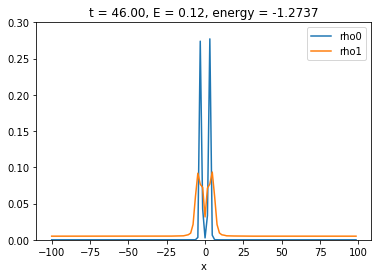

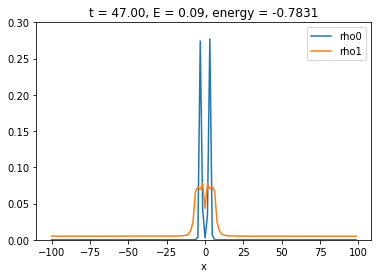

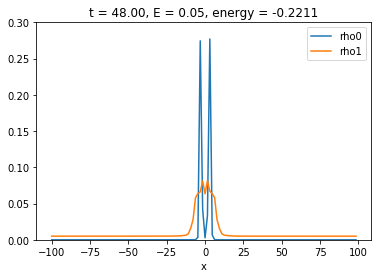

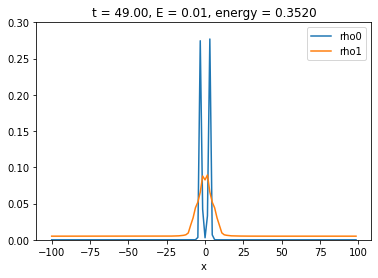

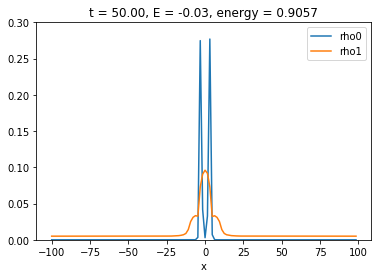

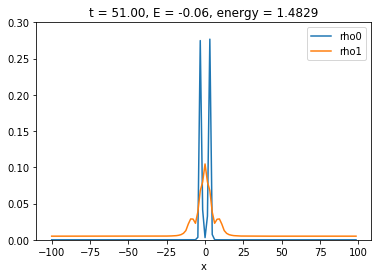

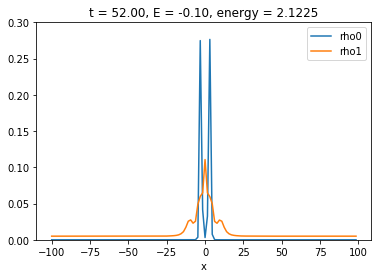

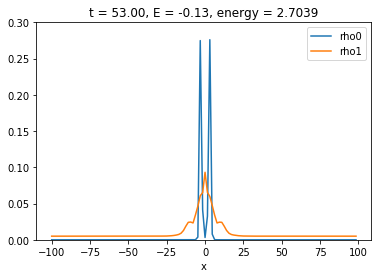

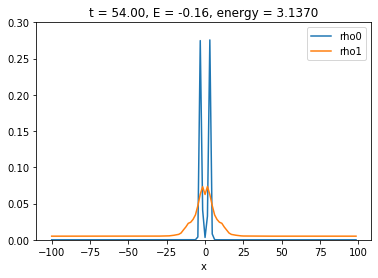

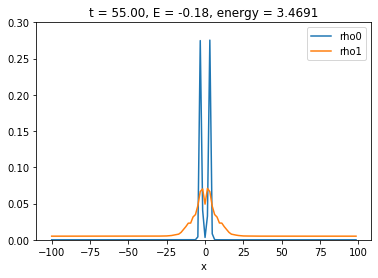

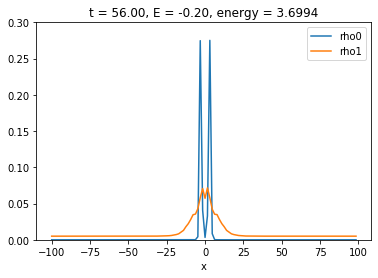

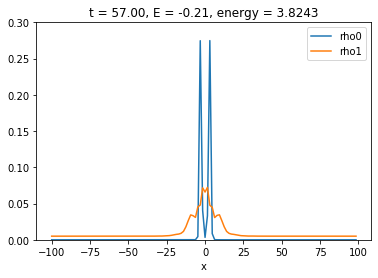

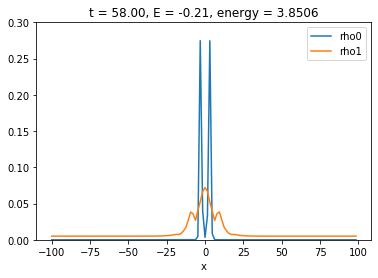

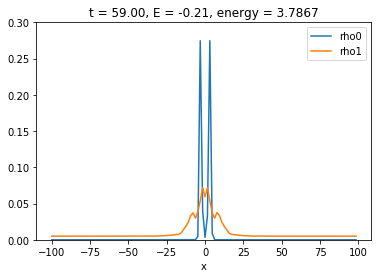

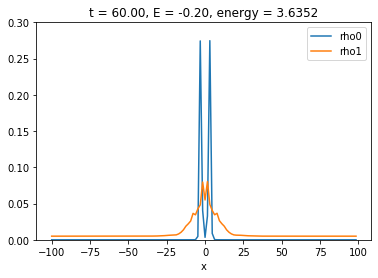

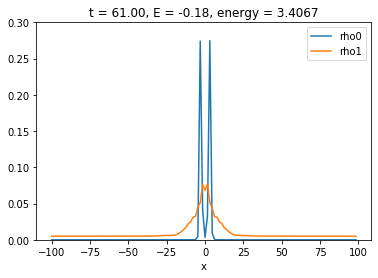

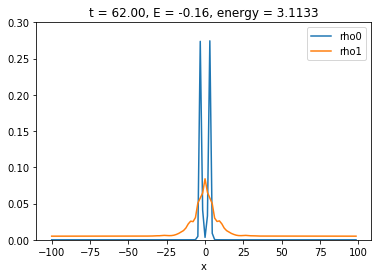

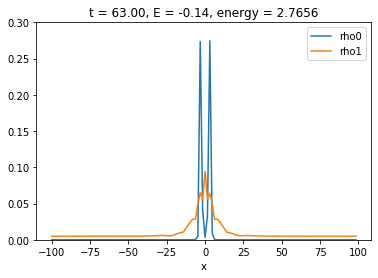

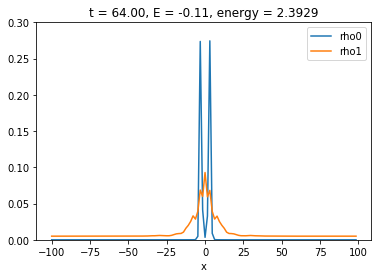

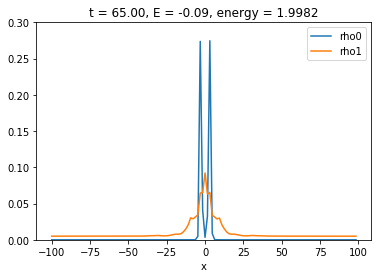

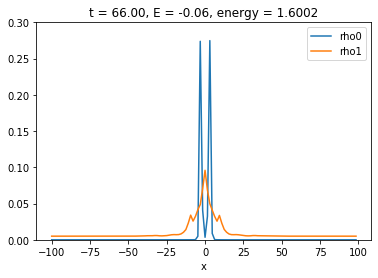

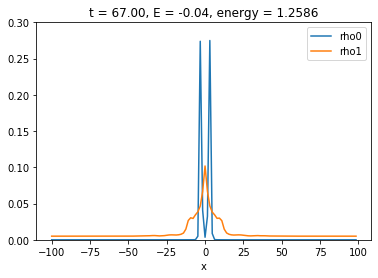

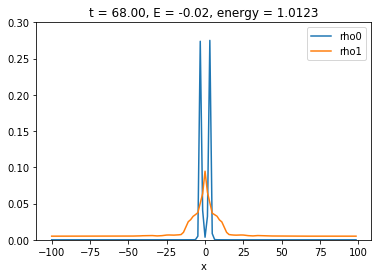

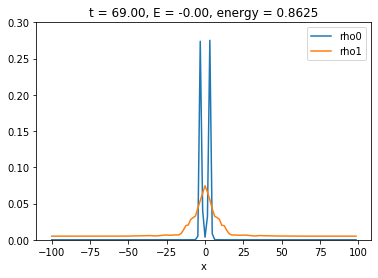

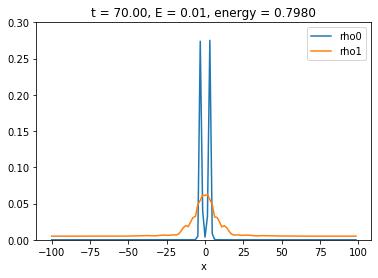

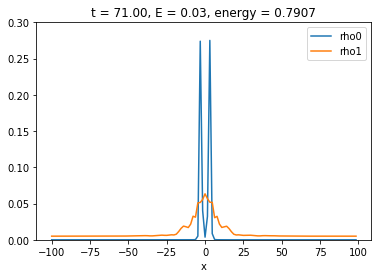

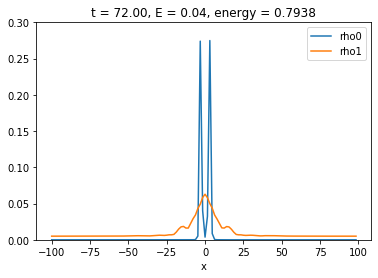

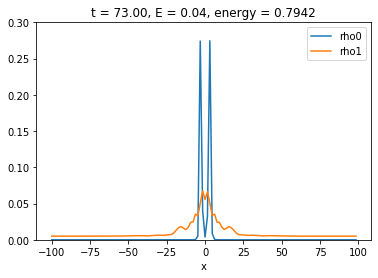

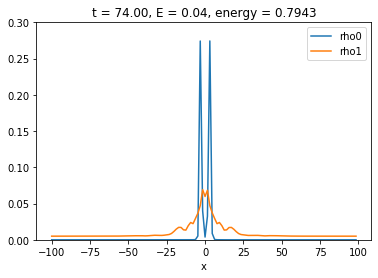

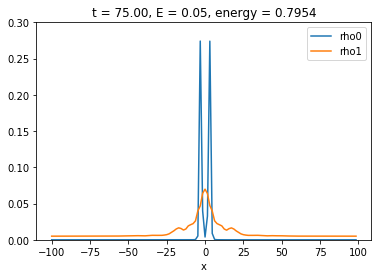

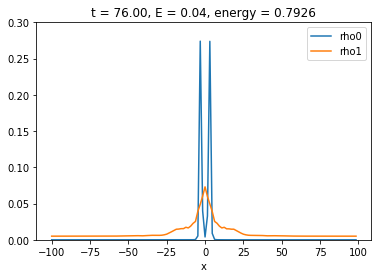

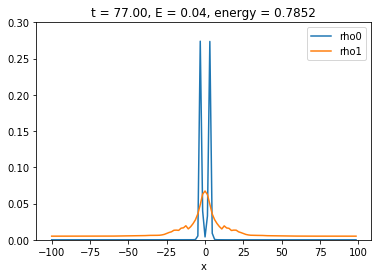

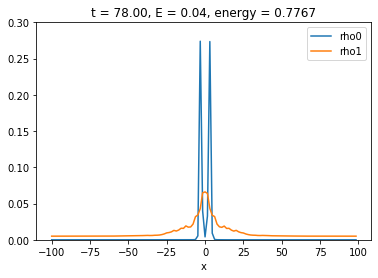

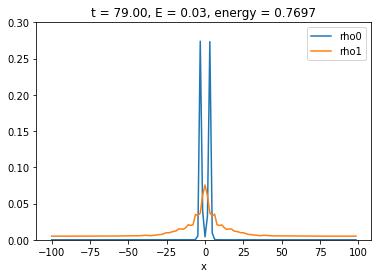

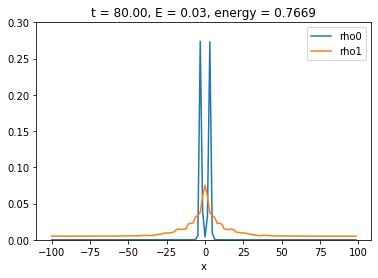

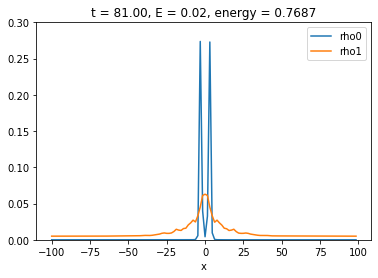

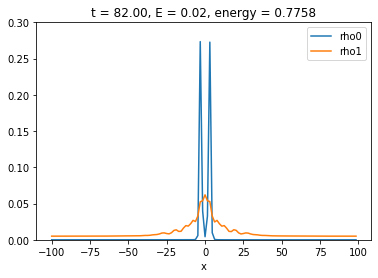

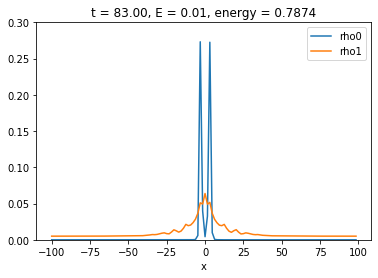

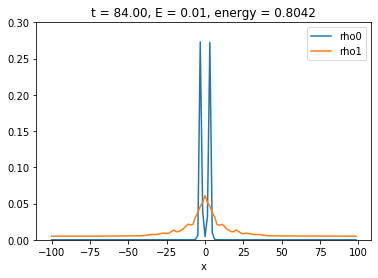

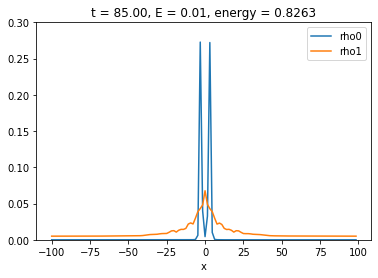

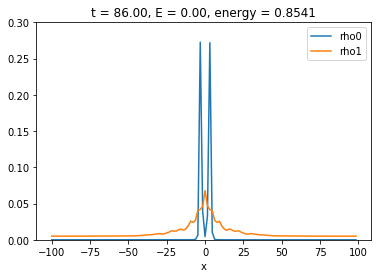

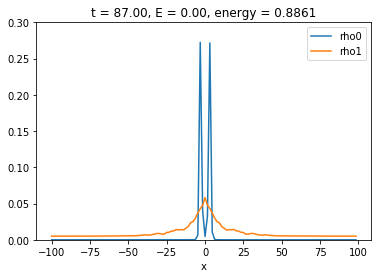

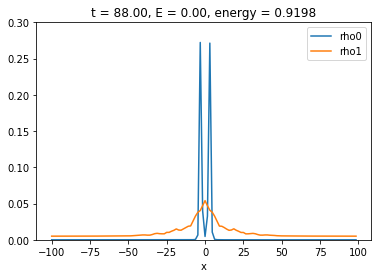

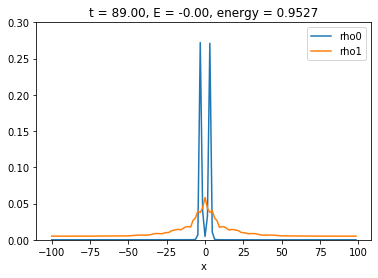

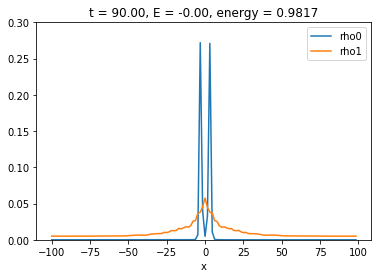

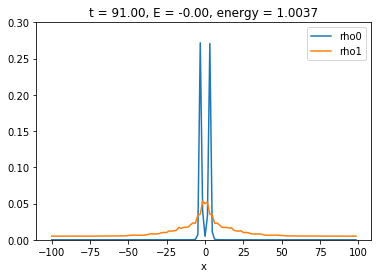

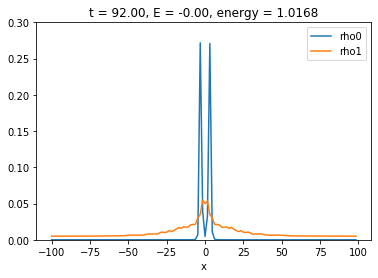

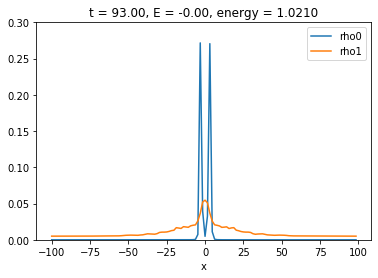

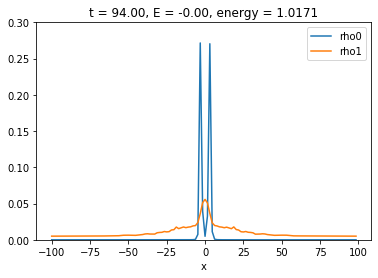

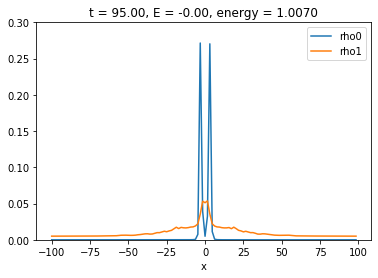

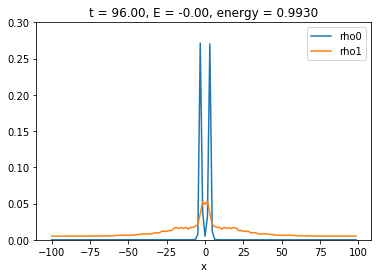

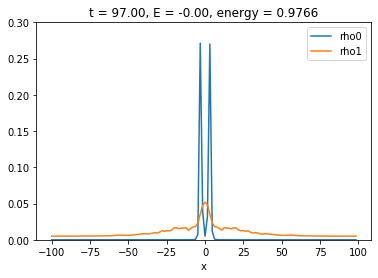

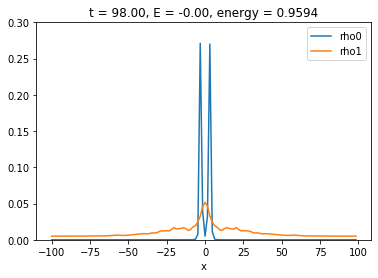

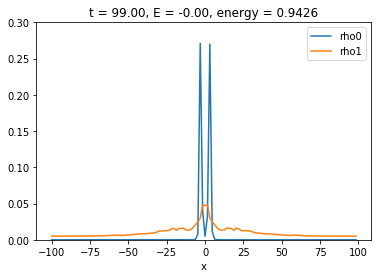

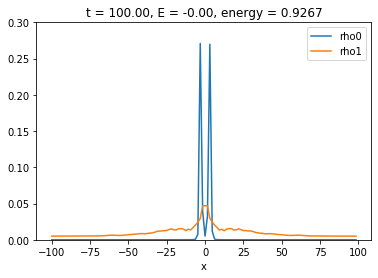

In [21]:
# Time range for simulation.
t_range = np.arange(0,t_final+dt,dt)

# Number of wavefunction saves
n_save = int(t_final)

# Number of real-time inspections of results
n_inspect = 100

# Buffers for saving complete density and current histories
dens_hist = np.zeros((len(grid.x[0]),len(t_range), 3), dtype=float)
curr_hist = np.zeros((len(grid.x[0]),len(t_range), 3), dtype=float)
energy_hist = np.zeros(len(t_range), dtype=float)

# si = index for saves
si = 0

# Create a file name
from datetime import datetime
fname = f'results_{datetime.now().strftime("%d%m%Y_%H%M")}.h5'

# Open an h5 file 
with h5py.File(fname,'w') as h5file:
    
    # Save simulation parameters.
    h5file.create_dataset('/parameters/time', data=t_range)
    h5file.create_dataset('/parameters/grid', data=grid.x)
    h5file.create_dataset('/parameters/hamiltonian/T', data = ham.T)
    h5file.create_dataset('/parameters/hamiltonian/V', data = ham.V)
    h5file.create_dataset('/parameters/hamiltonian/D', data = ham.D)
    h5file.create_dataset('/parameters/hamiltonian/E', data = Efun(t_range))
    
    # Loop over time steps
    for i in tqdm(range(len(t_range))):
        t = t_range[i]
        
        # Compute currents and densities
        for n in range(3):
            dens_hist[:,i,n] = wf.density(n)
            curr_hist[:,i,n] = wf.current(n)
        #h5file.create_dataset(f'/densities/{i}/rho', data = dens_hist[:,i,:],compression='gzip')
        #h5file.create_dataset(f'/currents/{i}/jp', data = curr_hist[:,i,:],compression='gzip')
        energy_hist[i] = ham.energy(wf, Efun(t)).real
        
        # Save wavefunction
        if i % int(t_final/n_save/dt) == 0:
            h5file.create_dataset(f'/wavefunctions/{si}/psi', data=wf.psi, compression='gzip') 
            h5file.create_dataset(f'/wavefunctions/{si}/t', data=t) 
            si += 1
        
        # Visualize in real time
        if i % int(t_final/n_inspect/dt) == 0:
            visualize(wf,f't = {t:.2f}, E = {Efun(t):.2f}, energy = {energy_hist[i]:.4f}')
            
        # Time step
        prop.strang(wf,t, will_do_another_step=False) # we need the updating of the fft for correct observables
    
    # Save energy history, density, and current
    h5file.create_dataset('/energy', data=energy_hist)
    h5file.create_dataset('/density', data=dens_hist,compression='gzip')
    h5file.create_dataset('/current', data=curr_hist,compression='gzip')
        


## Final visualization of densities as function of time

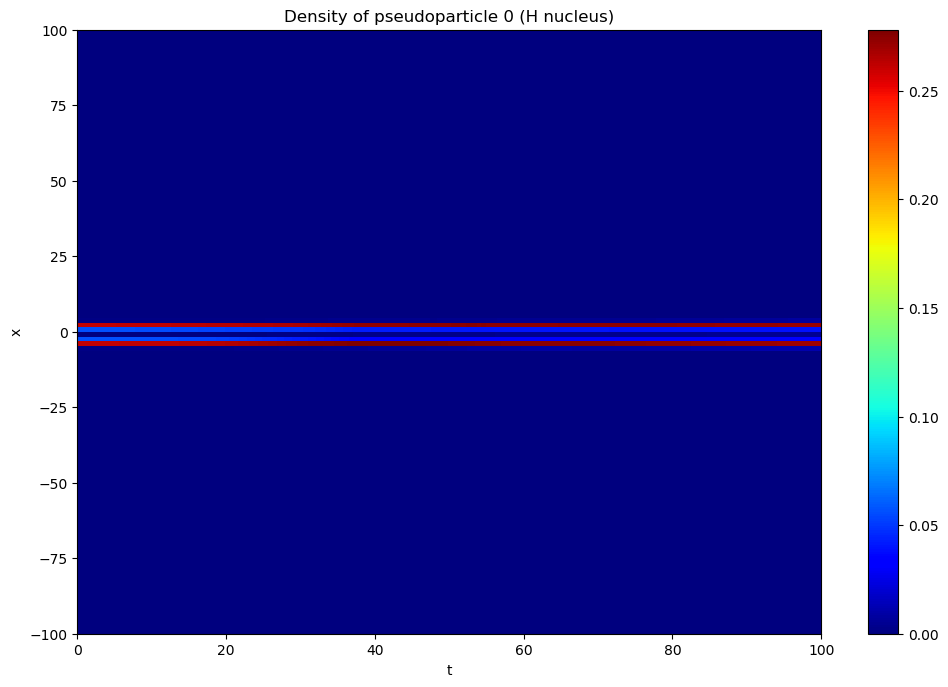

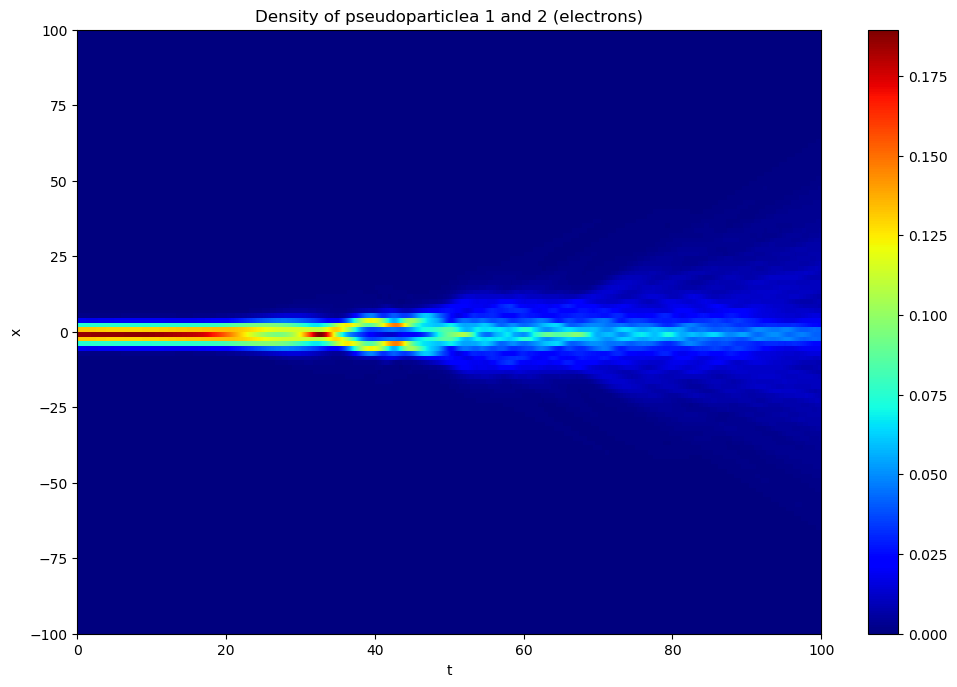

In [22]:
plt.figure(figsize=(12,8), dpi= 100)
plt.imshow(dens_hist[:,:,0],aspect='auto',extent=[0,t_final,-L,L],cmap='jet')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Density of pseudoparticle 0 (H nucleus)')
plt.figure(figsize=(12,8), dpi= 100)
plt.imshow(dens_hist[:,:,1],aspect='auto',extent=[0,t_final,-L,L],cmap='jet')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Density of pseudoparticlea 1 and 2 (electrons)')
plt.show()